# **SimpleRNN Test Code**

In [1]:
import warnings
warnings.filterwarnings('ignore')

> ## **Import Packages**

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# **I. SimpleRNN - without Normalization**

> ## **1) Sample Data**

- Inputs 데이터 생성 → (100, 5, 1)

In [3]:
X = [[[i + j] for i in range(5)] for j in range(100)]

X[:3], X[-3:]

([[[0], [1], [2], [3], [4]],
  [[1], [2], [3], [4], [5]],
  [[2], [3], [4], [5], [6]]],
 [[[97], [98], [99], [100], [101]],
  [[98], [99], [100], [101], [102]],
  [[99], [100], [101], [102], [103]]])

- Outputs 데이터 생성 → (100, 1)

In [4]:
y = [(i + 5) for i in range(100)]

y[:3], y[-3:]

([5, 6, 7], [102, 103, 104])

> ## **2) Numpy_Array Casting**

In [5]:
X = np.array(X, dtype=float)
y = np.array(y, dtype=float)

X.shape, y.shape

((100, 5, 1), (100,))

> ## **3) Train vs. Test Split**

- 80:20

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=2045)

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((80, 5, 1), (80,), (20, 5, 1), (20,))

> ## **4) Keras SimpleRNN Modeling**

### **(1) Model Define & Summary**
- Unit(output_dim) : 3
- input_shape(input_length, input_dim) : (5, 1)
- return_sequences=False : 최종 Unit만 출력 → **<span style="color:orange">Stacked_SimpleRNN</span>을 사용하기 위해서는 <span style="color:blue">True</span>**(아래 코드로 예시 나옴)
- layers.Dense(1) : y_hat

In [7]:
from tensorflow.keras import models, layers

model_1 = models.Sequential(name='SimpleRNN_1')
model_1.add(layers.SimpleRNN(3,
                             input_shape=(5, 1),
                             return_sequences=False))
model_1.add(layers.Dense(1))   # 수치 예측이기 때문에 노드 1개

model_1.summary()

Model: "SimpleRNN_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn (SimpleRNN)       (None, 3)                 15        
_________________________________________________________________
dense (Dense)                (None, 1)                 4         
Total params: 19
Trainable params: 19
Non-trainable params: 0
_________________________________________________________________


### **(2) Model Compile**

In [8]:
model_1.compile(loss='mse',
                optimizer='adam',
                metrics=['accuracy'])   # 연속된 수치이기 때문에 어떤 걸로 해도 무방

### **(3) Model Fit**

In [9]:
Hist_1 = model_1.fit(X_train, y_train,
                     epochs=100,
                     batch_size=8,
                     validation_data=(X_test, y_test))

Epoch 1/100
10/10 [==============================] - 1s 31ms/step - loss: 3556.9487 - accuracy: 0.0000e+00 - val_loss: 3505.4675 - val_accuracy: 0.0000e+00
Epoch 2/100
10/10 [==============================] - 0s 4ms/step - loss: 3552.7156 - accuracy: 0.0000e+00 - val_loss: 3501.3384 - val_accuracy: 0.0000e+00
Epoch 3/100
10/10 [==============================] - 0s 4ms/step - loss: 3548.6646 - accuracy: 0.0000e+00 - val_loss: 3497.1406 - val_accuracy: 0.0000e+00
Epoch 4/100
10/10 [==============================] - 0s 4ms/step - loss: 3544.5327 - accuracy: 0.0000e+00 - val_loss: 3492.9688 - val_accuracy: 0.0000e+00
Epoch 5/100
10/10 [==============================] - 0s 4ms/step - loss: 3540.4761 - accuracy: 0.0000e+00 - val_loss: 3488.7812 - val_accuracy: 0.0000e+00
Epoch 6/100
10/10 [==============================] - 0s 4ms/step - loss: 3536.2749 - accuracy: 0.0000e+00 - val_loss: 3484.6882 - val_accuracy: 0.0000e+00
Epoch 7/100
10/10 [==============================] - 0s 5ms/step - lo

### **(4) Model Predict**

In [10]:
y_hat = model_1.predict(X_test)

### **(5) 학습 결과 시각화**

- Loss 감소

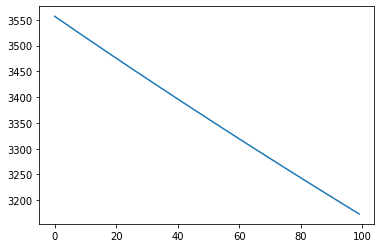

In [11]:
plt.plot(Hist_1.history['loss'])
plt.show()

- 학습 되지 않음
  - <span style="color:green">**녹색**</span> → **정답(y_test)**
  - <span style="color:red">**적색**</span> → **예측(y_hat)**

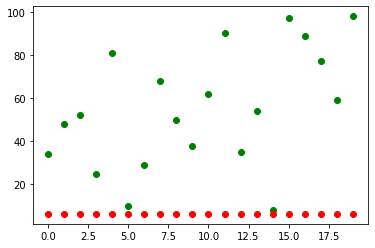

In [12]:
plt.scatter(range(20), y_test, c='g')
plt.scatter(range(20), y_hat, c='r')
plt.show()

# **II. SimpleRNN - with Normalization**

> ## **1) Sample Data - with Normalization**

In [13]:
X = [[[i + j] for i in range(5)] for j in range(100)]
y= [(i + 5) for i in range(100)]

X = (X - np.min(X)) / (np.max(X) - np.min(X))
y = (y - np.min(y)) / (np.max(y) - np.min(y))

> ## **2) Casting**

In [14]:
X = np.array(X, dtype=float)
y = np.array(y, dtype=float)

X.shape, y.shape

((100, 5, 1), (100,))

> ## **3) Train vs. Test Split**

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=2045)

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((80, 5, 1), (80,), (20, 5, 1), (20,))

> ## **4) Keras SimpleRNN Modeling**

### **(1) Model Define & Summary**

- None : input_length 자동 맞춤

In [16]:
model_2 = models.Sequential(name='SimpleRNN_2')
model_2.add(layers.SimpleRNN(3,
                             input_shape=(None, 1),
                             return_sequences=False))
model_2.add(layers.Dense(1))

model_2.summary()

Model: "SimpleRNN_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_1 (SimpleRNN)     (None, 3)                 15        
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 4         
Total params: 19
Trainable params: 19
Non-trainable params: 0
_________________________________________________________________


> ### **(2) Model Compile**

In [17]:
model_2.compile(loss='mse',
                optimizer='adam',
                metrics=['accuracy'])

### **(3) Model Fit**

In [18]:
Hist_2 = model_2.fit(X_train, y_train,
                     epochs=100,
                     batch_size=8,
                     validation_data=(X_test, y_test))

Epoch 1/100
10/10 [==============================] - 1s 27ms/step - loss: 1.9728 - accuracy: 0.0125 - val_loss: 1.8704 - val_accuracy: 0.0000e+00
Epoch 2/100
10/10 [==============================] - 0s 5ms/step - loss: 1.7796 - accuracy: 0.0125 - val_loss: 1.6736 - val_accuracy: 0.0000e+00
Epoch 3/100
10/10 [==============================] - 0s 5ms/step - loss: 1.5938 - accuracy: 0.0125 - val_loss: 1.4839 - val_accuracy: 0.0000e+00
Epoch 4/100
10/10 [==============================] - 0s 5ms/step - loss: 1.4181 - accuracy: 0.0125 - val_loss: 1.3018 - val_accuracy: 0.0000e+00
Epoch 5/100
10/10 [==============================] - 0s 5ms/step - loss: 1.2438 - accuracy: 0.0125 - val_loss: 1.1319 - val_accuracy: 0.0000e+00
Epoch 6/100
10/10 [==============================] - 0s 4ms/step - loss: 1.0880 - accuracy: 0.0125 - val_loss: 0.9674 - val_accuracy: 0.0000e+00
Epoch 7/100
10/10 [==============================] - 0s 4ms/step - loss: 0.9276 - accuracy: 0.0125 - val_loss: 0.8207 - val_accur

### **(4) Model Predict**

In [19]:
y_hat = model_2.predict(X_test)

### **(5) 학습 결과 시각화**

- Loss 감소

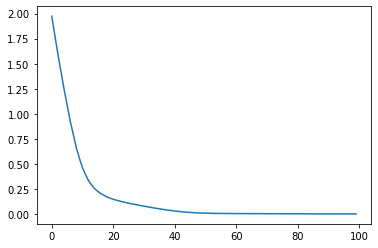

In [20]:
plt.plot(Hist_2.history['loss'])
plt.show()

- 학습 수행
  - <span style="color:green">**녹색**</span> → **정답(y_test)**
  - <span style="color:red">**적색**</span> → **예측(y_hat)**

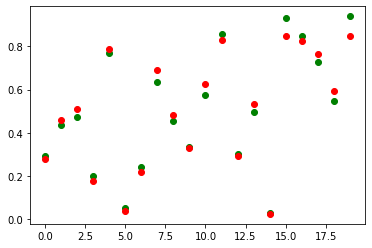

In [21]:
plt.scatter(range(20), y_test, c='g')
plt.scatter(range(20), y_hat, c='r')
plt.show()

# **III. Stacked_SimpleRNN**

> ## **1) Model Define & Summary**

- return_sequences=<span style="color:blue">**True**</span>

In [22]:
model_3 = models.Sequential(name='Stacked_RNN')
model_3.add(layers.SimpleRNN(3,
                             input_shape=(None, 1),
                             return_sequences=True))    # CNN 중간에는 True
model_3.add(layers.SimpleRNN(3,
                             input_shape=(None, 1),
                             return_sequences=False))   # CNN 마지막에는 False
model_3.add(layers.Dense(1))

model_3.summary()

Model: "Stacked_RNN"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_2 (SimpleRNN)     (None, None, 3)           15        
_________________________________________________________________
simple_rnn_3 (SimpleRNN)     (None, 3)                 21        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 4         
Total params: 40
Trainable params: 40
Non-trainable params: 0
_________________________________________________________________


> ## **2) Model Compile**

In [23]:
model_3.compile(loss='mse',
                optimizer='adam',
                metrics=['accuracy'])

> ## **3) Model Fit**

In [24]:
Hist_3 = model_3.fit(X_train, y_train,
                     epochs=100,
                     batch_size=8,
                     validation_data=(X_test, y_test))

Epoch 1/100
10/10 [==============================] - 2s 38ms/step - loss: 0.5785 - accuracy: 0.0125 - val_loss: 0.4721 - val_accuracy: 0.0000e+00
Epoch 2/100
10/10 [==============================] - 0s 6ms/step - loss: 0.4127 - accuracy: 0.0125 - val_loss: 0.3285 - val_accuracy: 0.0000e+00
Epoch 3/100
10/10 [==============================] - 0s 5ms/step - loss: 0.2882 - accuracy: 0.0125 - val_loss: 0.2181 - val_accuracy: 0.0000e+00
Epoch 4/100
10/10 [==============================] - 0s 5ms/step - loss: 0.1938 - accuracy: 0.0125 - val_loss: 0.1422 - val_accuracy: 0.0000e+00
Epoch 5/100
10/10 [==============================] - 0s 5ms/step - loss: 0.1325 - accuracy: 0.0125 - val_loss: 0.0928 - val_accuracy: 0.0000e+00
Epoch 6/100
10/10 [==============================] - 0s 6ms/step - loss: 0.0907 - accuracy: 0.0125 - val_loss: 0.0647 - val_accuracy: 0.0000e+00
Epoch 7/100
10/10 [==============================] - 0s 5ms/step - loss: 0.0646 - accuracy: 0.0125 - val_loss: 0.0500 - val_accur

> ## **4) Model Predict**

In [25]:
y_hat = model_3.predict(X_test)

> ## **5) 학습 결과 시각화**

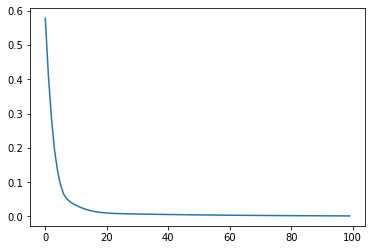

In [26]:
plt.plot(Hist_3.history['loss'])
plt.show()

- 학습 수행
  - <span style="color:green">**녹색**</span> → **정답(y_test)**
  - <span style="color:red">**적색**</span> → **예측(y_hat)**

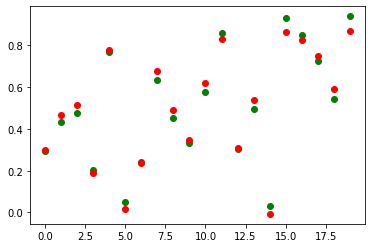

In [27]:
plt.scatter(range(20), y_test, c='g')
plt.scatter(range(20), y_hat, c='r')
plt.show()

# **IV. 'return_sequences' Output_Options**
- 'input_length'에 대한 Sequence 전체를 출력할지 설정
  - 'False' vs. 'True'

> ## **1) 실습 데이터 생성**

In [28]:
X = [[[i + j] for i in range(5)] for j in range(100)]
y = [i + 5 for i in range(100)]

In [29]:
X = np.array(X, dtype=float)
y = np.array(y, dtype=float)

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=2045)

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((80, 5, 1), (80,), (20, 5, 1), (20,))

> ## **2) 테스트용 Input Data**

In [31]:
X_test[0].reshape(1, 5, 1)

array([[[29.],
        [30.],
        [31.],
        [32.],
        [33.]]])

> ## **3) False_Option**

- 마지막 Output만 출력

In [32]:
Model_False = models.Sequential()
Model_False.add(layers.SimpleRNN(1,
                                 input_shape=(5, 1), 
                                 return_sequences=False))

Model_False.compile(loss='mse',
                    optimizer='adam',
                    metrics=['accuracy'])

In [33]:
Model_False.predict(X_test[0].reshape(1, 5, 1))

array([[1.]], dtype=float32)

- 마지막 Output만 출력
  - Unit : 1 → 3

In [34]:
Model_False = models.Sequential()
Model_False.add(layers.SimpleRNN(3,
                                 input_shape=(5, 1), 
                                 return_sequences=False))

Model_False.compile(loss='mse',
                    optimizer='adam',
                    metrics=['accuracy'])

In [35]:
Model_False.predict(X_test[0].reshape(1, 5, 1))

array([[-1.       , -0.9999989, -1.       ]], dtype=float32)

> ## **4) True_Option**

- 매 순환마다 Output 출력
  - Unit : 1
  - input_length : 5

In [36]:
Model_True = models.Sequential()
Model_True.add(layers.SimpleRNN(1,
                                input_shape=(5, 1), 
                                return_sequences=True))

Model_True.compile(loss='mse',
                   optimizer='adam',
                   metrics=['accuracy'])

In [37]:
Model_True.predict(X_test[0].reshape(1, 5, 1))

array([[[-0.9999915 ],
        [-0.9999591 ],
        [-0.99997324],
        [-0.9999826 ],
        [-0.9999887 ]]], dtype=float32)

- 매 순환마다 Output 출력
  - Unit : 1 → 3
  - input_length : 5

In [38]:
Model_True = models.Sequential()
Model_True.add(layers.SimpleRNN(3,
                                input_shape=(5, 1), 
                                return_sequences=True))

Model_True.compile(loss='mse',
                   optimizer='adam',
                   metrics=['accuracy'])

In [39]:
Model_True.predict(X_test[0].reshape(1, 5, 1))

array([[[-1.       ,  1.       ,  0.9999976],
        [-1.       ,  1.       ,  1.       ],
        [-1.       ,  1.       ,  1.       ],
        [-1.       ,  1.       ,  1.       ],
        [-1.       ,  1.       ,  1.       ]]], dtype=float32)